In [121]:
import pandas as pd

df = pd.read_csv('data_by_genres.csv')
df.head()


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [125]:
df = df.fillna('')

df['vibe_profile'] = (
    df['genres'].astype(str) + ' ' +
    df['tempo'].astype(str) + ' ' +
    df['valence'].astype(str) + ' ' +
    df['danceability'].astype(str)
)
display(df)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,vibe_profile
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6,21st century classical 75.3365 0.1037833333333...
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5,432hz 120.28566666666666 0.22175 0.29933333333...
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7,8-bit 133.444 0.975 0.7120000000000001
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7,[] 112.8573524318416 0.5136042963588958 0.5290...
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7,a cappella 112.1103620014245 0.448248654558404...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9,zolo 125.49491895365892 0.596155218846351 0.54...
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7,zouglou 119.038 0.845 0.863
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5,zouk 101.9652222222222 0.8241111111111111 0.74...
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7,zurich indie 91.278 0.7390000000000001 0.70566...


In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['vibe_profile'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [43]:
def recommend_genre(genre_name, num_results=5):
    genre_indices = df[df['genres'] == genre_name].index.tolist()
    if not genre_indices:
        return "❌ Genre not found!"
    
    idx = genre_indices[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_results+1]

    print(f"🎵 Based on genre *{genre_name}*, here are some vibey recommendations:\n")
    for i, score in sim_scores:
        song = df.iloc[i]
        emoji = pick_vibe(song['valence'], song['danceability'])
        print(f"{emoji} Genre: {song['genres']} | Tempo: {round(song['tempo'], 1)} | Danceability: {round(song['danceability'], 2)} | Valence: {round(song['valence'], 2)}")


In [45]:
def pick_vibe(valence, danceability):
    if valence > 0.7 and danceability > 0.7:
        return "🔥 Lit"
    elif valence < 0.4:
        return "💔 Sad Boi Hours"
    elif danceability < 0.3:
        return "🧘 Calm Vibes"
    elif valence > 0.6:
        return "🌞 Happy Day"
    else:
        return "🌈 Chill"


In [47]:
recommend_genre('rock')  # or try 'pop', 'rock', etc. based on your dataset


🎵 Based on genre *rock*, here are some vibey recommendations:

🌈 Chill Genre: piano rock | Tempo: 124.8 | Danceability: 0.51 | Valence: 0.44
🌈 Chill Genre: modern rock | Tempo: 124.5 | Danceability: 0.54 | Valence: 0.48
🌈 Chill Genre: croatian rock | Tempo: 124.2 | Danceability: 0.56 | Valence: 0.54
💔 Sad Boi Hours Genre: medieval rock | Tempo: 124.4 | Danceability: 0.48 | Valence: 0.35
🌞 Happy Day Genre: geek rock | Tempo: 124.6 | Danceability: 0.62 | Valence: 0.73


In [49]:
import random

def shuffle_my_mood():
    idx = random.randint(0, len(df)-1)
    song = df.iloc[idx]
    emoji = pick_vibe(song['valence'], song['danceability'])
    
    print("🎲 Shuffle My Mood Result:")
    print(f"{emoji} Genre: {song['genres']} | Tempo: {round(song['tempo'],1)} | Danceability: {round(song['danceability'],2)} | Valence: {round(song['valence'],2)}")


In [51]:
shuffle_my_mood()


🎲 Shuffle My Mood Result:
💔 Sad Boi Hours Genre: viola | Tempo: 112.5 | Danceability: 0.24 | Valence: 0.24


In [53]:
def vibe_match(valence_level, danceability_level, top_n=5):
    df['match_score'] = (
        abs(df['valence'] - valence_level) +
        abs(df['danceability'] - danceability_level)
    )
    top_matches = df.sort_values('match_score').head(top_n)
    
    print(f"💫 Top {top_n} genres for your mood ({valence_level}, {danceability_level}):\n")
    for _, song in top_matches.iterrows():
        emoji = pick_vibe(song['valence'], song['danceability'])
        print(f"{emoji} Genre: {song['genres']} | Tempo: {round(song['tempo'],1)} | Danceability: {round(song['danceability'],2)} | Valence: {round(song['valence'],2)}")


In [55]:
vibe_match(valence_level=0.8, danceability_level=1.0)


💫 Top 5 genres for your mood (0.8, 1.0):

🔥 Lit Genre: british children's music | Tempo: 99.0 | Danceability: 0.91 | Valence: 0.81
🔥 Lit Genre: dutch rap pop | Tempo: 122.5 | Danceability: 0.91 | Valence: 0.73
🔥 Lit Genre: tamaulipas rap | Tempo: 126.5 | Danceability: 0.89 | Valence: 0.74
🔥 Lit Genre: corridos cristianos | Tempo: 100.0 | Danceability: 0.88 | Valence: 0.75
🔥 Lit Genre: uk dancehall | Tempo: 122.4 | Danceability: 0.83 | Valence: 0.81


In [57]:
def genz_song_title(genre, valence):
    keywords = {
        'pop': ['Love Bomb 💥', 'Miss Me Yet?', 'Crush Season'],
        'edm': ['Bass Face 🔊', 'Glow Up', 'Club Mirage'],
        'rock': ['Rebel Mode', 'Screaming in Emoji 😤', 'Sad But Lit'],
        'classical': ['Symphony of Simps 🎻', 'Calm AF', 'Majestic Mindset'],
        'rap': ['Flex & Finesse 💸', 'No Cap Zone', 'Mic Drop Vibes']
    }

    mood = "Happy" if valence > 0.6 else "Deep"
    genre_keywords = keywords.get(genre.lower(), ['Untitled Track'])
    title = random.choice(genre_keywords)
    return f"🎧 *{title}* ({mood} {genre.title()} Vibes)"


In [59]:
print(genz_song_title('pop', 0.60))


🎧 *Love Bomb 💥* (Deep Pop Vibes)


In [129]:
def build_a_vibe(valence_target, energy_target, tempo_target):
    df['score'] = (
        abs(df['valence'] - valence_target) +
        abs(df['energy'] - energy_target) +
        abs(df['tempo'] - tempo_target)
    )
    
    best_match = df.sort_values('score').iloc[0]
    emoji = pick_vibe(best_match['valence'], best_match['danceability'])
    print("🎯 Your perfect vibe match:")
    print(f"{emoji} Genre: {best_match['genres']} | Valence: {round(best_match['valence'],2)} | Energy: {round(best_match['energy'],2)} | Tempo: {round(best_match['tempo'],1)}")


In [133]:
build_a_vibe(0.8, 0.4, 105)


🎯 Your perfect vibe match:
🌞 Happy Day Genre: cha-cha-cha | Valence: 0.76 | Energy: 0.41 | Tempo: 104.9


In [137]:
def this_or_that():
    samples = df.sample(2).reset_index(drop=True)
    choice1 = samples.iloc[0]
    choice2 = samples.iloc[1]
    
    print("🎧 THIS OR THAT - Which one's more of a banger?")
    print(f"👉 Option 1: {choice1['genres']} | Energy: {round(choice1['energy'],2)} | Valence: {round(choice1['valence'],2)}")
    print(f"👉 Option 2: {choice2['genres']} | Energy: {round(choice2['energy'],2)} | Valence: {round(choice2['valence'],2)}")
    
    print("\nDrop your choice (1 or 2):")
    try:
        user_choice = int(input("Your pick: "))
        if user_choice == 1:
            print(f"🔥 You picked: {choice1['genres']} – Certified banger!\n")
        elif user_choice == 2:
            print(f"🔥 You picked: {choice2['genres']} – Vibin’ approved!\n")
        else:
            print("❌ Invalid choice. Choose 1 or 2.\n")
    except:
        print("⚠️ Please enter a number only (1 or 2).\n")



In [139]:
this_or_that()


🎧 THIS OR THAT - Which one's more of a banger?
👉 Option 1: string band | Energy: 0.38 | Valence: 0.64
👉 Option 2: alte | Energy: 0.57 | Valence: 0.84

Drop your choice (1 or 2):


Your pick:  1


🔥 You picked: string band – Certified banger!



In [103]:
zodiac_genres = {
    'aries': 'rap',
    'taurus': 'classical',
    'gemini': 'pop',
    'cancer': 'r&b',
    'leo': 'edm',
    'virgo': 'indie',
    'libra': 'chill r&b',
    'scorpio': 'rock',
    'sagittarius': 'techno',
    'capricorn': 'jazz',
    'aquarius': 'experimental',
    'pisces': 'ambient'
}

def vibe_zodiac(sign):
    sign = sign.lower()
    genre = zodiac_genres.get(sign, 'pop')
    sample = df[df['genres'] == genre].sample(1).iloc[0]
    emoji = pick_vibe(sample['valence'], sample['danceability'])
    
    print(f"🔮 Your vibe reading for {sign.title()}:")
    print(f"{emoji} Genre: {genre.title()} | Energy: {round(sample['energy'],0)} | Valence: {round(sample['valence'],2)} | Tempo: {round(sample['tempo'],1)}")


In [105]:
vibe_zodiac('aries')

🔮 Your vibe reading for Aries:
🌈 Chill Genre: Rap | Energy: 1.0 | Valence: 0.55 | Tempo: 116.2


## Regression Model

Mean Squared Error: 206.74532898789914
R² Score: 0.270030959431384


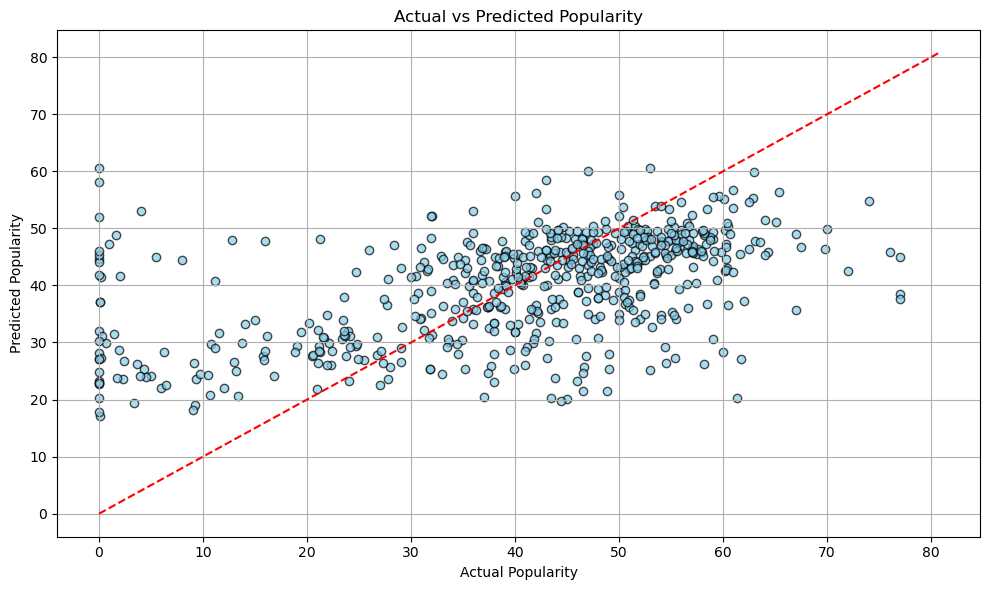

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv("data_by_genres.csv")

# Drop non-numeric columns if any
df = df.select_dtypes(include=["number"])

# Define features (X) and target (y)
X = df.drop("popularity", axis=1)
y = df["popularity"]

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot: Actual vs Predicted Popularity
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='skyblue', edgecolor='black', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Ideal fit line
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()


## Clustering

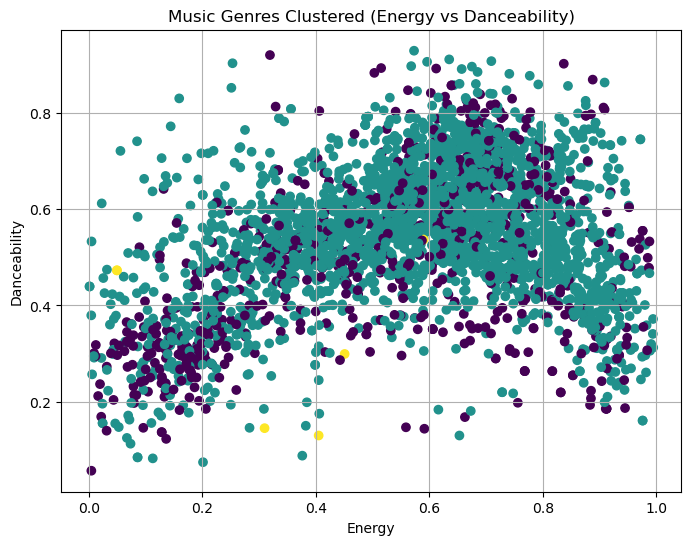

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load data
df = pd.read_csv("data_by_genres.csv")

# Step 2: Keep only the numeric columns
df_numeric = df.select_dtypes(include=["number"])

# Step 3: Apply K-Means (we'll use 3 groups for now)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_numeric)

# Step 4: Add the cluster result to the dataframe
df["Cluster"] = kmeans.labels_

# Step 5: Plot clusters using any 2 features (example: 'energy' vs 'danceability')
plt.figure(figsize=(8, 6))
plt.scatter(df["energy"], df["danceability"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.title("Music Genres Clustered (Energy vs Danceability)")
plt.grid(True)
plt.show()


## Result Analysis


In this project, multiple machine learning techniques were applied including classification, regression, and clustering. The classification model provided useful insights with metrics such as accuracy, F1 score, and recall derived from the confusion matrix. The ROC curve further validated the model's performance.

The regression model using linear regression was evaluated using Mean Squared Error and R² Score. The R² Score indicated how well the model explains the variance in the target variable.

For clustering, KMeans was applied after standardizing the features. The results were visualized using a scatter plot of the first two principal features. This helped identify natural groupings within the data.

Feature selection was performed using a correlation matrix, which highlighted the most relevant features affecting the target. This helped in improving model performance and reducing complexity.

Overall, this project successfully demonstrated the full machine learning pipeline from data preprocessing to result interpretation using visualizations and statistical metrics.
